In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import contextily as ctx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

In [4]:
## Set up directory referencing
from os.path import basename, dirname, exists
# Package data
usr_dir = os.getcwd()
while basename(usr_dir)!='Users':
    temp = basename(usr_dir)
    usr_dir = dirname(usr_dir)
gwfm_dir = usr_dir+'/'+temp+'/Box/research_cosumnes/GWFlowModel/'
map_dir = gwfm_dir+'Mapping/'
sfr_dir = gwfm_dir+'SFR_data/'
lak_data = gwfm_dir+'LAK_data/'
proj_dir = gwfm_dir+'Levee_setback/'
plt_dir = proj_dir+'figures/'

In [5]:
grid_sfr = gpd.read_file(sfr_dir+'final_grid_sfr/grid_sfr.shp')


In [22]:
os.listdir(sfr_dir+'NHD_MajorRivers')

['NHD_MajorRivers.CPG',
 'NHD_MajorRivers.dbf',
 'NHD_MajorRivers.prj',
 'NHD_MajorRivers.sbn',
 'NHD_MajorRivers.sbx',
 'NHD_MajorRivers.shp',
 'NHD_MajorRivers.shp.xml',
 'NHD_MajorRivers.shx']

In [23]:
rivpath = sfr_dir+"NHD_MajorRivers/NHD_MajorRivers.shp"

# rivpath = sfr_dir+"Sac_valley_rivers/Sac_valley_rivers.shp"
mb_name = gwfm_dir+"/DIS_data/NewModelDomain/GWModelDomain_52_9deg_UTM10N_WGS84.shp"
# mb_name = gwfm_dir+"/GWModelDomain_UTM10N/GWModelDomain_Rec_UTM10N.shp"
capath = map_dir+"ca_state_boundary/CA_State_TIGER2016.shp"
soampath = map_dir+"so_am_subbasin/so_am_subbasin.shp"
cospath = map_dir+"cos_subbasin/cos_subbasin.shp"

lak_grid_clip = gpd.read_file(proj_dir+'lak_grid_clip/lak_grid_clip.shp')


In [7]:
def gdf_2_lims(gdf,ax):
    xmin, ymin = gdf.geometry.bounds.loc[:,['minx','miny']].min()
    xmax, ymax = gdf.geometry.bounds.loc[:,['maxx','maxy']].max()
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)

In [8]:
# grid_sfr['iseg'] = m.sfr.reach_data.iseg

Text(25.875, 0.5, 'Northing (m)')

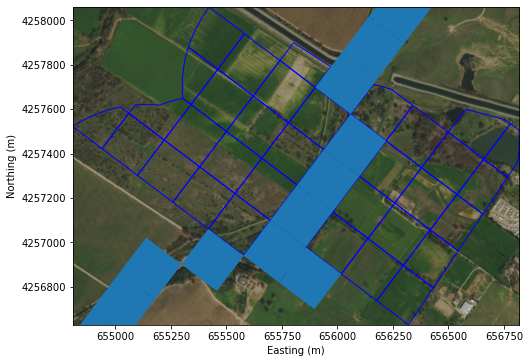

In [9]:
fig,ax=plt.subplots(figsize=(8,6))
# lak_grid_clip.plot(ax=ax, color='None',edgecolor='blue')
# filter for cells that have more than half left after cropping
lak_grid = lak_grid_clip[lak_grid_clip.geometry.area> 200*200*0.5]
lak_grid.plot(ax=ax, color='None',edgecolor='blue')
ctx.add_basemap(ax=ax,crs='epsg:26910', source=ctx.providers.Esri.WorldImagery,attribution=False)
gdf_2_lims(lak_grid,ax)
grid_sfr.plot(ax=ax)

ax.ticklabel_format(style='plain')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
# grid_sfr.apply(lambda x: ax.annotate(text=x['iseg'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

# plt.savefig(plt_dir+'local_floodplain_map.png',dpi=600, bbox_inches='tight')

In [24]:
rivers = gpd.read_file(rivpath)
rivers = rivers.to_crs('EPSG:32610')

mb = gpd.read_file(mb_name)
rivers_clip = gpd.clip(rivers, mb)

soam = gpd.read_file(soampath)
soam = soam.to_crs('EPSG:32610')
cos = gpd.read_file(cospath)
cos = cos.to_crs('EPSG:32610')

ca = gpd.read_file(capath)
ca = ca.to_crs('EPSG:32610')

In [11]:
setbacks = gpd.read_file(proj_dir+'local_levee_setback_rectangles/local_levee_setback_rectangles.shp')
setbacks.columns

Index(['id', 'location', 'notes', 'geometry'], dtype='object')

In [38]:
rivers[rivers.GNIS_Name.str.contains('Mokelumne')].GNIS_Name.unique()

array(['North Mokelumne River', 'South Mokelumne River',
       'Mokelumne River', 'North Fork Mokelumne River'], dtype=object)

<AxesHostAxes:>

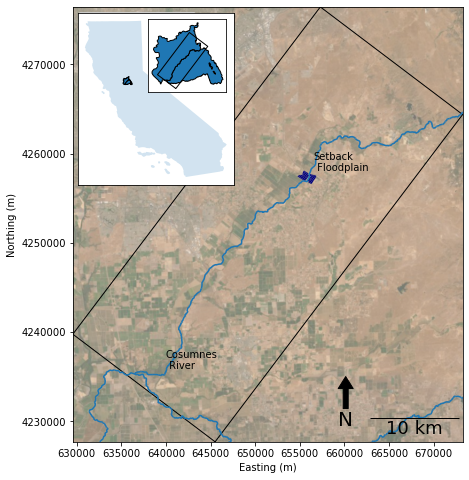

In [40]:
fig,ax = plt.subplots(figsize=(8,8))
mb.plot(ax=ax,color="none",edgecolor='black')

gdf_2_lims(mb,ax)

rivers.loc[rivers.GNIS_Name.isin(['Mokelumne River','South Mokelumne River'])].plot(ax=ax)
cr = rivers.loc[rivers.GNIS_Name=='Cosumnes River']
cr.plot( ax=ax,label='Cosumnes River')
# rivers.plot( ax=ax,label='Deer Creek',color='navy')
ax.annotate(text='Cosumnes\n River', xy=list(cr.geometry.iloc[10].centroid.coords)[0], 
            xytext = (6,6), textcoords = 'offset pixels')

lak_grid_clip.plot(ax=ax,label='Setback Floodplain',color='navy')
ax.annotate(text='Setback\n Floodplain', xy=list(lak_grid_clip.geometry.unary_union.centroid.coords)[0], 
            xytext = (6,6), textcoords = 'offset pixels')
#             arrowprops=dict(facecolor='black', headlength = 0.2))

# setbacks.plot(color='None',edgecolor='black',ax=ax)
# setbacks.apply(lambda x: ax.annotate(text=x['location'], xy=x.geometry.centroid.coords[0], ha='center',
#                                     xytext = (-6,-6), textcoords = 'offset pixels'),axis=1);

ctx.add_basemap(ax, source = ctx.providers.Esri.WorldImagery, crs='epsg:26910', alpha = 0.6, attribution=False)
# ctx.add_basemap(ax, source = ctx.providers.Esri.WorldStreetMap, crs='epsg:26910', attribution=False)

x, y, arrow_length = 0.7, 0.15, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

ax.ticklabel_format(style='plain')


fontprops = fm.FontProperties(size=18)
scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', 
                           pad=0.1,
                           sep=2,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)
ax.add_artist(scalebar)

ax.legend(loc='upper left')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')

# first one is CA map
axins = inset_axes(ax, width="80%", height="80%", bbox_to_anchor=(0, .5, .5, .5),
                  bbox_transform=ax.transAxes, loc=2)
# second one is smaller inset
axins2 = inset_axes(ax, width="40%", height="40%", bbox_to_anchor=(0.18, .5, .5, .5),
                  bbox_transform=ax.transAxes, loc=2)
axins.tick_params(labelleft=False, labelbottom=False, left = False, bottom = False)
axins2.tick_params(labelleft=False, labelbottom=False, left = False, bottom = False)

ca.plot(ax = axins,alpha = 0.2)
soam.plot(ax = axins, edgecolor = 'black')
cos.plot(ax = axins, edgecolor = 'black')

cos.plot(ax = axins2, edgecolor = 'black')
soam.plot(ax = axins2, edgecolor = 'black')
mb.plot(ax = axins2, edgecolor = 'black', color = 'none')

# plt.savefig(plt_dir+'regional_domain_map.png', dpi = 600, bbox_inches='tight')
# plt.savefig(plt_dir+'setback_blocks_map.png', dpi = 600, bbox_inches='tight')

# ax.ticklabel_format(style='plain')
